In [21]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../../..')
from src import load_image, ImageQuant2
%matplotlib widget

In [22]:
n = 10
cytbg = np.loadtxt('../../../data/calibration_cyt.txt')

In [23]:
# Import dataframe
df = pd.read_csv('../../../data/Par2_NEBD_Embryos_dataframe.csv')

# Select 10 random wild type, C56S and L109R embryos
df_wt = df[(df.Line == 'lp637') * (df.RNAi == 'wt')].sample(n)
df_c56s = df[(df.Line == 'nwg240') * (df.RNAi == 'wt')].sample(n)
df_l109r = df[(df.Line == 'nwg338') * (df.RNAi == 'wt')].sample(n)
df_l50r = df[(df.Line == 'nwg400') * (df.RNAi == 'wt')].sample(n)
df_het = df[(df.Line == 'nwg325bal') * (df.RNAi == 'wt')].sample(n)
df_sample = pd.concat([df_wt, df_c56s, df_l109r, df_l50r, df_het])

df_sample.to_csv('../../../data/calibration_df.csv')

In [24]:
df = pd.read_csv('../../../data/calibration_df.csv')
df

,Unnamed: 0,Unnamed: 0.1,Path,EmbryoID,Line,Date,RNAi
0,141,141,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1626965652,lp637,210722,wt
1,368,368,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1659695815,lp637,220805,wt
2,395,395,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1661259794,lp637,220823,wt
3,156,156,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1636207243,lp637,211106,wt
4,192,192,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1636725257,lp637,211112,wt
5,125,125,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1619616861,lp637,210428,wt
6,399,399,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1661260543,lp637,220823,wt
7,375,375,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1659702640,lp637,220805,wt
8,398,398,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1661260423,lp637,220823,wt
9,158,158,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1636207547,lp637,211106,wt


In [25]:
paths_wt = df[df.Line == 'lp637'].Path.to_list()
paths_c56s = df[df.Line == 'nwg240'].Path.to_list()
paths_l109r = df[df.Line == 'nwg338'].Path.to_list()
paths_l50r = df[df.Line == 'nwg400'].Path.to_list()
paths_het = df[df.Line == 'nwg325bal'].Path.to_list()
print(len(paths_wt))

10


In [26]:
imgs_wt = [load_image(p + '/af_corrected.tif') for p in paths_wt]
imgs_c56s = [load_image(p + '/af_corrected.tif') for p in paths_c56s]
imgs_l109r = [load_image(p + '/af_corrected.tif') for p in paths_l109r]
imgs_l50r = [load_image(p + '/af_corrected.tif') for p in paths_l50r]
imgs_het = [load_image(p + '/af_corrected.tif') for p in paths_het]

rois_wt = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_wt]
rois_c56s = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_c56s]
rois_l109r = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_l109r]
rois_l50r = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_l50r]
rois_het = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_het]

In [27]:
kwargs_dict = {'lr': 0.005, 'descent_steps': 1000}

### WT calibration

100%|██████████| 1000/1000 [00:09<00:00, 102.29it/s]


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

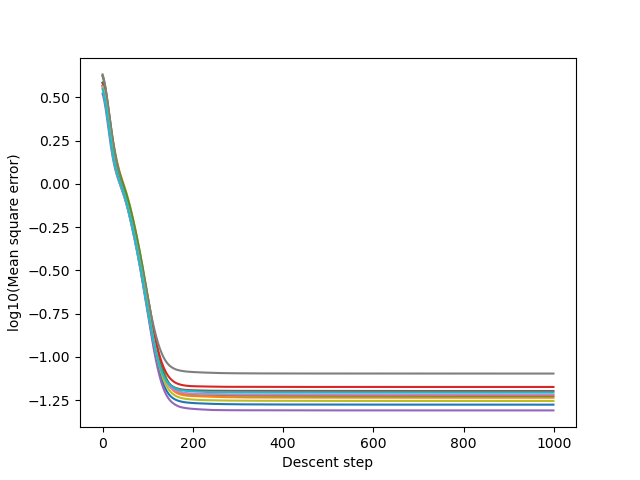

In [28]:
iq1 = ImageQuant2(img=imgs_wt, roi=rois_wt, cytbg=cytbg)
iq1.calibrate_membrane(**kwargs_dict)
iq1.plot_losses(log=True)

### C56S calibration

100%|██████████| 1000/1000 [00:07<00:00, 126.64it/s]


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

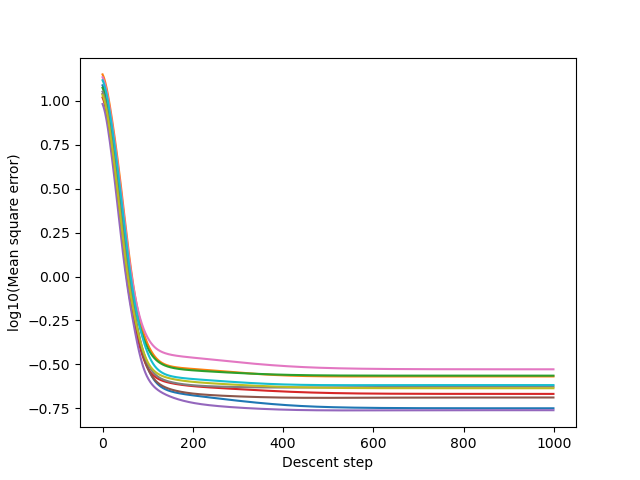

In [29]:
iq2 = ImageQuant2(img=imgs_c56s, roi=rois_c56s, cytbg=cytbg)
iq2.calibrate_membrane(**kwargs_dict)
iq2.plot_losses(log=True)

### L109R calibration

100%|██████████| 1000/1000 [00:08<00:00, 119.38it/s]


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

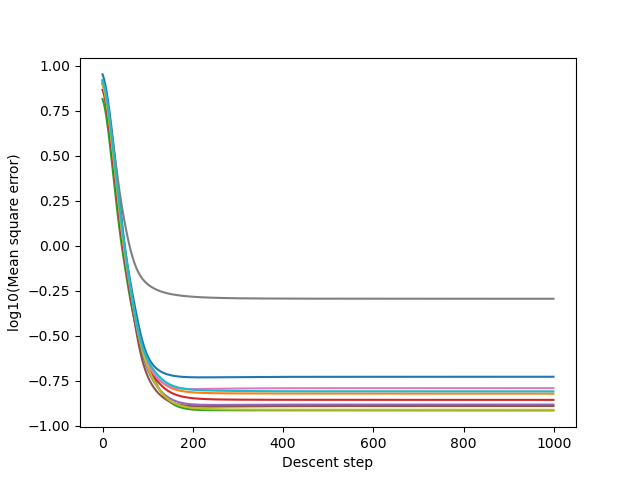

In [30]:
iq3 = ImageQuant2(img=imgs_l109r, roi=rois_l109r, cytbg=cytbg)
iq3.calibrate_membrane(**kwargs_dict)
iq3.plot_losses(log=True)

### L50R calibration

100%|██████████| 1000/1000 [00:09<00:00, 104.88it/s]


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

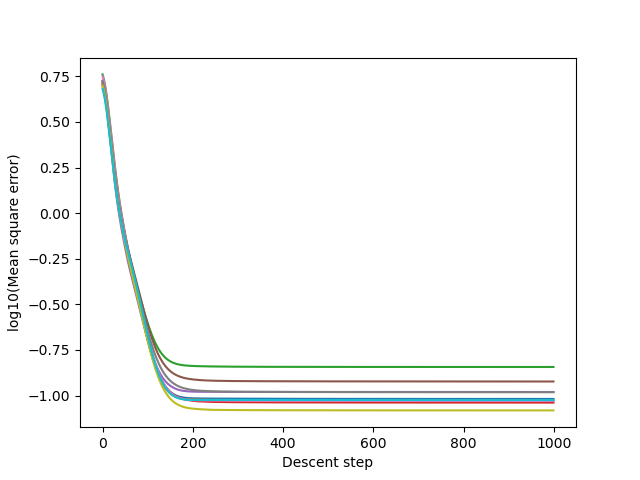

In [31]:
iq4 = ImageQuant2(img=imgs_l50r, roi=rois_l50r, cytbg=cytbg)
iq4.calibrate_membrane(**kwargs_dict)
iq4.plot_losses(log=True)

### Het calibration

100%|██████████| 1000/1000 [00:11<00:00, 90.89it/s]


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

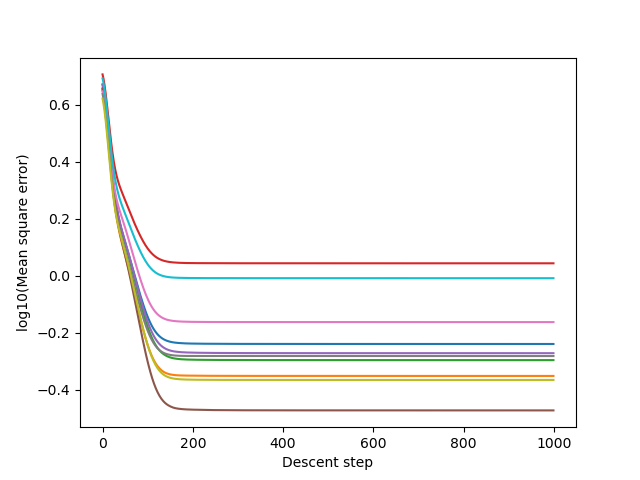

In [32]:
iq5 = ImageQuant2(img=imgs_het, roi=rois_het, cytbg=cytbg)
iq5.calibrate_membrane(**kwargs_dict)
iq5.plot_losses(log=True)

### Full dataset calibration

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:21<00:00, 46.60it/s]


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

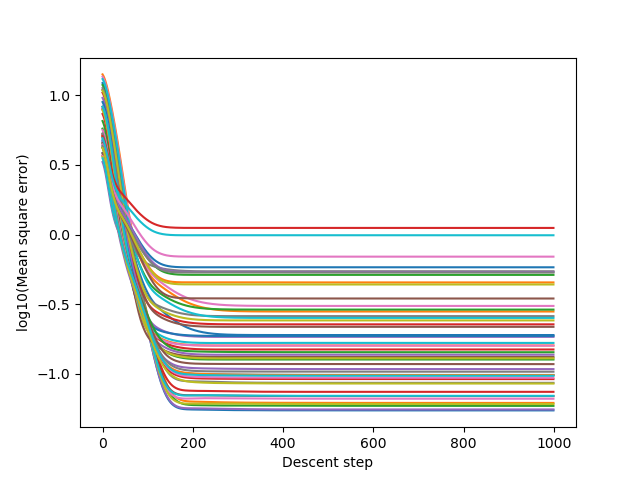

In [33]:
iq6 = ImageQuant2(img=imgs_wt + imgs_c56s + imgs_l109r + imgs_l50r + imgs_het, 
                  roi=rois_wt + rois_c56s + rois_l109r + rois_l50r + rois_het, cytbg=cytbg)
iq6.calibrate_membrane(**kwargs_dict)
iq6.plot_losses(log=True)

### View results

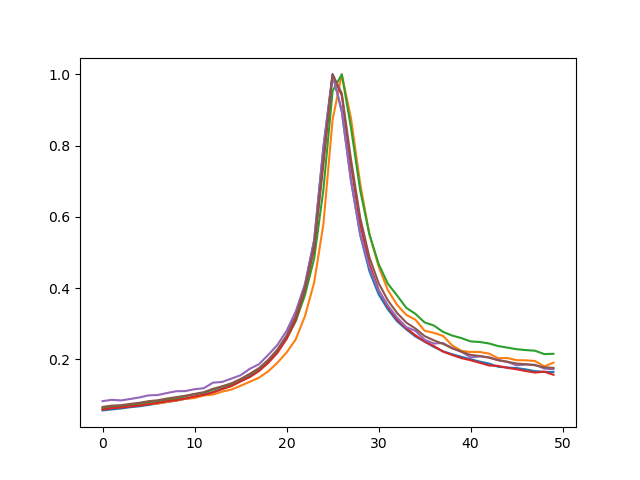

In [34]:
fig, ax = plt.subplots()
ax.plot(iq1.membg.T / np.max(iq1.membg))
ax.plot(iq2.membg.T / np.max(iq2.membg))
ax.plot(iq3.membg.T / np.max(iq3.membg))
ax.plot(iq4.membg.T / np.max(iq4.membg))
ax.plot(iq5.membg.T / np.max(iq5.membg))
ax.plot(iq6.membg.T / np.max(iq6.membg))

In [35]:
np.savetxt('../../../data/calibration_mem1.txt', iq1.membg)
np.savetxt('../../../data/calibration_mem2.txt', iq2.membg)
np.savetxt('../../../data/calibration_mem3.txt', iq3.membg)
np.savetxt('../../../data/calibration_mem4.txt', iq4.membg)
np.savetxt('../../../data/calibration_mem5.txt', iq5.membg)
np.savetxt('../../../data/calibration_mem6.txt', iq6.membg)